In [1]:
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
# drive.flush_and_unmount()

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/My Drive/COMP4433_Group Project/Final_submission")
!ls

Log1_test_p10.csv   Report1_eda_preprocessing.ipynb
Log1_train_p10.csv  Report2_featureEngineering.ipynb


In [5]:
import pandas as pd
path = "/content/drive/My Drive/COMP4433_Group Project"

train = pd.read_csv(path+'/Final_submission/Log1_train_p10.csv')
test = pd.read_csv(path+'/Final_submission/Log1_test_p10.csv')

In [6]:
train = train.drop(columns=['Unnamed: 0'])
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,2.352941,7.5,2.076677,0.334198,10.0,5.0,10.0,10.0,0.0,10.0,0.0,2.083333,2.50,2.857143,0.0,7.142857,6.666667,5.00,9.492754,8.833333,2.0,0.0,8.571429,8.666667,3.333333,1.22500,6.666667,10.0,4.0,5.0,10.0,10.0,3.333333,3.226691,10.000000,0.642123,2.675000,2.0,0.0,10.0,10.0,1.803732,4.697470,4.178561,3.333333,6.666667,5.0,3.75,3.333333,6.666667,5.000000,10.000000,0.000000,6.0,1.666667,9.965174,6.666667,5.0,3.942446,10.0,10.0,10.0,0.000000,1.115174,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.247699
1,0.000000,7.5,2.555911,0.387950,10.0,5.0,10.0,10.0,0.0,5.0,0.0,10.000000,1.25,2.857143,0.0,2.857143,5.555556,8.75,7.536232,4.333333,2.0,0.0,5.714286,5.333333,6.666667,0.00000,10.000000,10.0,2.0,5.0,10.0,2.5,0.000000,4.469835,10.000000,1.215753,3.943750,2.0,0.0,10.0,10.0,3.206634,0.000000,2.818099,0.000000,6.666667,0.0,3.75,3.333333,10.000000,3.333333,10.000000,3.333333,10.0,1.666667,9.830846,6.666667,5.0,3.309353,10.0,10.0,10.0,3.477246,0.000000,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.109016
2,2.352941,7.5,2.172524,0.465073,10.0,5.0,0.0,10.0,0.0,10.0,0.0,2.083333,2.50,2.857143,0.0,7.142857,6.666667,5.00,9.347826,8.666667,2.0,0.0,8.571429,8.666667,3.333333,1.01250,6.666667,10.0,4.0,5.0,10.0,5.0,3.333333,2.221207,10.000000,1.857877,2.875000,2.0,0.0,10.0,10.0,2.024879,4.763476,4.409353,3.333333,6.666667,5.0,3.75,3.333333,6.666667,3.333333,10.000000,3.333333,10.0,1.666667,9.955224,6.666667,5.0,4.374101,10.0,10.0,10.0,0.000000,0.767824,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.317171
3,2.941176,7.5,1.916933,0.385613,10.0,5.0,0.0,10.0,0.0,0.0,0.0,2.500000,2.50,2.857143,0.0,7.142857,6.666667,5.00,3.115942,3.333333,2.0,0.0,9.285714,10.000000,6.666667,0.00000,10.000000,10.0,0.0,10.0,2.5,10.0,0.000000,0.987203,10.000000,2.311644,2.362500,2.0,5.0,10.0,10.0,2.166551,4.158416,4.199818,3.333333,3.333333,0.0,3.75,3.333333,6.666667,4.166667,10.000000,3.333333,4.0,8.333333,9.940299,10.000000,7.5,4.618705,10.0,10.0,10.0,0.000000,0.639854,4.927536,0.0,0.0,10.0,10.0,2.5,10.0,0.0,11.849405
4,2.352941,7.5,2.683706,0.605763,10.0,5.0,0.0,10.0,0.0,5.0,0.0,6.250000,2.50,2.857143,0.0,7.142857,7.777778,5.00,9.275362,8.333333,2.0,0.0,8.571429,8.666667,3.333333,2.18750,6.666667,10.0,4.0,5.0,10.0,0.0,3.333333,2.993601,10.000000,2.097603,3.578125,2.0,0.0,10.0,10.0,2.802350,5.792079,5.660492,3.333333,6.666667,5.0,5.00,3.333333,6.666667,5.833333,10.000000,3.333333,10.0,1.666667,9.950249,6.666667,7.5,6.014388,10.0,10.0,10.0,2.240373,1.535649,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2.352941,7.5,1.980831,0.309285,10.0,5.0,10.0,10.0,0.0,10.0,0.0,3.333333,2.50,2.857143,0.0,7.142857,5.555556,5.00,9.202899,8.333333,2.0,0.0,8.571429,8.666667,6.666667,0.00000,10.000000,10.0,4.0,5.0,10.0,10.0,10.000000,0.000000,10.000000,4.079623,2.978125,2.0,0.0,10.0,10.0,2.138908,3.817382,3.987246,0.000000,6.666667,5.0,3.75,3.333333,10.000000,4.166667,10.000000,3.333333,10.0,1.666667,9.945274,6.666667,5.0,3.309353,10

In [7]:
train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.00000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,2.171292,7.572215,1.829766,0.427502,9.958735,4.969051,6.49702,9.268684,0.006878,7.558459,0.312930,5.107176,2.538686,2.866968,1.237964,4.331892,5.651842,5.721286,7.184229,5.799060,2.815681,0.120358,6.874140,6.895919,5.873453,0.633524,8.486933,9.331155,2.788171,6.832875,9.224553,7.355571,5.253324,1.996431,9.311096,2.423048,3.278922,2.072902,3.861761,9.346630,9.202201,2.843594,1.889042,3.559771,1.412196,5.204035,1.905089,3.580640,3.489225,7.822100,3.754585,9.580468,2.028886,6.178817,4.150619,9.294484,6.272352,4.408528,3.390548,9.430536,9.524072,9.277854,1.095260,0.844949,0.399361,0.315065,0.027892,9.979367,8.760316,2.673659,9.392194,7.541953,12.021481
std,2.492728,1.583296,1.082834,0.461198,0.641276,1.250907,4.69147,2.338315,0.262251,4.048912,1.383866,2.507631,1.085437,0.363224,3.000822,2.730833,1.521649,1.393158,2.188405,3.442549,1.666768,0.965309,2.284216,2.360366,2.042720,1.106603,2.284386,1.832790,1.445680,3.182388,2.378418,3.916029,3.756519,1.965360,2.003944,1.890235,1.276661,0.591446,4.350737,2.472046,2.633177,1.276118,2.373681,1.509555,1.724786,1.826061,2.512584,1.020432,0.735908,2.742134,1.344004,1.635912,2.135451,2.327830,3.225298,2.261455,3.966725,1.864995,1.524182,1.800911,1.608361,2.487650,1.461463,1.195121,1.109219,1.163833,0.479784,0.380614,2.710094,0.932107,1.942597,2.195368,0.396083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,0.000000,7.500000,1.341853,0.291488,10.000000,5.000000,0.00000,10.000000,0.000000,5.000000,0.000000,2.916667,2.500000,2.857143,0.000000,2.857143,4.444444,5.000000,5.942029,2.708333,2.000000,0.000000,5.714286,5.333333,3.333333,0.000000,6.666667,10.000000,2.000000,5.000000,10.000000,5.000000,1.666667,0.000000,10.000000,0.948202,2.484375,2.000000,0.

In [8]:
test = test.drop(columns=['Unnamed: 0'])
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.000000,5.0,2.555911,0.482460,10.0,5.0,10.0,10.000000,0.0,10.0,0.0,5.000000,1.25,2.857143,0.0,2.857143,4.444444,6.25,6.449275,1.833333,2.0,0.0,8.571429,8.666667,6.666667,0.0000,10.000000,10.0,2.0,10.0,10.0,10.0,8.333333,2.138940,5.0,1.155822,2.756250,2.0,10.0,10.0,10.0,1.941949,0.000000,1.706650,0.000000,3.333333,0.0,2.50,3.333333,10.000000,2.500000,10.0,0.000000,6.0,1.666667,9.756219,10.000000,2.5,5.251799,10.0,10.0,10.0,1.633606,0.000000,0.0,2.5,0.0,10.0,5.0,2.5,10.0,8.0
1,0.000000,7.5,2.587859,0.606090,10.0,5.0,0.0,10.000000,0.0,0.0,0.0,5.000000,2.50,2.857143,0.0,2.857143,5.555556,6.25,6.231884,1.333333,6.0,0.0,9.285714,9.333333,3.333333,0.6750,10.000000,10.0,2.0,10.0,10.0,10.0,0.000000,4.218464,10.0,1.738014,4.153125,2.0,10.0,10.0,10.0,3.438148,0.000000,3.021561,0.000000,3.333333,5.0,3.75,3.333333,6.666667,3.333333,10.0,0.000000,6.0,1.666667,9.741294,10.000000,2.5,2.244604,10.0,10.0,10.0,4.585764,0.658135,0.0,0.0,0.0,10.0,10.0,0.0,10.0,8.0
2,2.352941,7.5,2.364217,0.585665,10.0,5.0,0.0,10.000000,0.0,10.0,0.0,3.333333,2.50,2.857143,0.0,7.142857,4.444444,5.00,9.057971,8.000000,2.0,0.0,8.571429,8.666667,6.666667,0.0000,10.000000,10.0,4.0,5.0,10.0,10.0,3.333333,3.615174,10.0,0.586473,2.900000,2.0,5.0,10.0,10.0,2.052522,3.855886,3.932584,0.000000,6.666667,5.0,3.75,3.333333,10.000000,3.333333,10.0,3.333333,10.0,1.666667,9.935323,0.000000,5.0,3.467626,10.0,10.0,10.0,2.473746,0.621572,0.0,0.0,0.0,10.0,5.0,2.5,10.0,8.0
3,2.352941,7.5,2.492013,0.405618,10.0,5.0,0.0,10.000000,0.0,10.0,0.0,3.333333,2.50,2.857143,0.0,7.142857,5.555556,6.25,9.130435,8.000000,2.0,0.0,8.571429,8.666667,3.333333,0.1250,10.000000,10.0,4.0,10.0,10.0,10.0,3.333333,2.751371,10.0,1.386986,2.893750,2.0,0.0,10.0,10.0,2.045612,3.729373,3.856666,0.000000,6.666667,5.0,3.75,3.333333,6.666667,4.166667,10.0,3.333333,4.0,1.666667,9.940299,0.000000,5.0,3.381295,10.0,10.0,10.0,4.200700,0.658135,0.0,0.0,0.0,10.0,10.0,2.5,10.0,8.0
4,5.882353,7.5,1.373802,0.173175,10.0,5.0,0.0,3.333333,0.0,10.0,0.0,9.166667,2.50,2.857143,10.0,2.857143,7.777778,5.00,8.695652,7.000000,2.0,0.0,4.285714,4.000000,6.666667,0.0000,6.666667,10.0,4.0,5.0,10.0,10.0,0.000000,1.202011,10.0,4.353596,4.000000,2.0,0.0,10.0,10.0,3.268832,0.000000,2.872760,0.000000,6.666667,0.0,2.50,3.333333,6.666667,2.500000,10.0,0.000000,6.0,1.666667,9.910448,6.666667,5.0,3.640288,10.0,10.0,10.0,0.000000,1.499086,0.0,3.0,0.0,10.0,10.0,2.5,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,8.235294,10.0,0.670927,0.029727,10.0,5.0,10.0,10.000000,0.0,10.0,0.0,4.166667,2.50,2.857143,7.5,7.142857,3.333333,7.50,7.101449,3.333333,2.0,0.0,3.571429,3.333333,6.666667,0.0000,10.000000,10.0,2.0,10.0,10.0,10.0,10.000000,0.000000,10.0,2.337329,1.706250,2.0,5.0,10.0,10.0,0.732550,3.003300,2.301852,0.000000,3.333333,5.0,3.75,3.333333,10.000000,2.500000,10.0,0.000000,6.0,10.000000,0.000000,3.333333,0.0,0.000000,6.0,6.0,10.0,0.000000,0.000000,0.0,0.0,0.0,10.0,10.0,2.5,10.0,8.0
1455,8.235294,10.0,0.670927,0.027764,10.0,5.0,10.0,10

In [9]:
test.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2.198726,7.566827,1.850167,0.398194,9.958876,4.886909,6.509024,9.255198,0.0,7.731323,0.226182,5.259596,2.561686,2.851268,1.295408,4.307255,5.643135,5.692255,7.199839,5.610464,2.764907,0.084533,6.874082,6.888280,5.905872,0.622961,8.405300,9.210075,2.779986,6.687800,9.143249,7.416038,5.359836,2.005954,9.187800,2.371212,3.266878,2.028787,3.822824,9.307745,9.220356,2.842207,1.793002,3.498469,1.446196,5.236463,1.888280,3.567512,3.474983,7.847841,3.654329,9.617318,1.937400,6.111035,4.136395,9.313382,6.239433,4.412269,3.398884,9.325565,9.531186,9.026731,1.087220,0.883253,0.439191,0.355509,0.023636,9.984007,8.706306,2.655929,9.336875,7.575051
std,2.514522,1.709779,1.030864,0.231626,0.640180,1.349780,4.702502,2.337801,0.0,3.964492,1.087830,2.457454,1.099694,0.204835,3.037452,2.735933,1.596457,1.392175,2.202179,3.521744,1.613209,0.785973,2.286824,2.374981,1.988759,1.106261,2.368424,2.032126,1.463871,3.284106,2.509114,3.826301,3.698296,2.080700,2.236117,1.872223,1.386228,0.365515,4.365381,2.539242,2.609982,1.375832,2.313588,1.474540,1.768424,1.850633,2.515083,1.037235,0.694906,2.795962,1.257412,1.481533,2.158068,2.244642,3.221805,2.217841,4.045007,1.942639,1.563503,1.997316,1.607452,2.871022,1.490605,1.259294,1.217894,1.179370,0.413166,0.380183,2.750097,0.886484,2.042657,2.110873
min,0.000000,0.000000,0.000000,0.007946,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.507246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.252246,0.000000,0.221682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.500000,1.405751,0.284699,10.000000,5.000000,0.000000,10.000000,0.0,5.000000,0.000000,3.333333,2.500000,2.857143,0.000000,2.857143,4.444444,5.000000,5.869565,2.166667,2.000000,0.000000,5.714286,5.333333,3.333333,0.000000,6.666667,10.000000,2.000000,5.000000,10.000000,5.000000,3.333333,0.000000,10.000000,0.937500,2.450000,2.000000,0.000000,10.000000,10.000000,1.864202,0.000000,2.379289,0.000000,3.333333

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

def RMSLE(actual, predicted):
  return mean_squared_error(np.log(actual), np.log(predicted), squared=False)

#1 Select a baseline model

We select a baseline model from some common models learnt in class: 
1. Decision Tree Regressor (DTR)
2. Linear Regression (LR)
3. K-nearest Neighbors (KNN)
4. Baysian Classification (BC)
5. Neural Networks (NN)

Since we only use KNN, BC for classification tasks, and NN is relatively complicated, we decided to choose between DT and LR only for the prediction task.

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['SalePrice']), train['SalePrice'], test_size=0.25, random_state=42)

reg = DecisionTreeRegressor(random_state=1)
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
RMSLE(y_test, y_predicted)

0.015405424319868138

In [12]:
from sklearn.linear_model import LinearRegression
# compare DT and LR, seems LR much better

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)
RMSLE(y_test, y_predicted)

0.010319090239995866

Thus, LR defeats DTR with a smaller RMSLE.

#2 Select features based on metrics correlation, feature importance, and LR coefficients

## 2.1 Eliminate one of each pair of highly correlated features

We want to delete one of two highly correlated features to prevent multi-colinearity

In [13]:
similar_pairs = [['GarageArea', 'GarageCars'], ['TotRmsAbvGrd', 'GrLivArea'], ['GarageYrBlt', 'YearBuilt'], ['1stFlrSF', 'TotalBsmtSF']]
msle1 = dict()

# find the best combination of eliminated features 
for i in range(2):
  for j in range(2):
    for p in range(2):
      for q in range(2):
        X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['SalePrice', similar_pairs[0][i], similar_pairs[1][j], similar_pairs[2][p], similar_pairs[3][q]]), train['SalePrice'], test_size=0.25, random_state=42)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_predicted = lr.predict(X_test)
        msle1[(i,j,p,q)] = RMSLE(y_test, y_predicted)

msle1

{(0, 0, 0, 0): 0.010225923391051385,
 (0, 0, 0, 1): 0.01021971973734413,
 (0, 0, 1, 0): 0.010550659248114913,
 (0, 0, 1, 1): 0.010538587360394269,
 (0, 1, 0, 0): 0.0111816254636336,
 (0, 1, 0, 1): 0.010292671740001416,
 (0, 1, 1, 0): 0.011342974286416209,
 (0, 1, 1, 1): 0.01059639590851903,
 (1, 0, 0, 0): 0.010157822875516639,
 (1, 0, 0, 1): 0.010166209711579171,
 (1, 0, 1, 0): 0.010523790994188006,
 (1, 0, 1, 1): 0.010521552644631994,
 (1, 1, 0, 0): 0.01104132671470881,
 (1, 1, 0, 1): 0.01023866708292409,
 (1, 1, 1, 0): 0.011247230217477082,
 (1, 1, 1, 1): 0.010576662804715468}

In [14]:
import operator

minimum1 = min(msle1.items(), key=operator.itemgetter(1))[0]
minimum1

(1, 0, 0, 0)

In [15]:
msle1[minimum1]

0.010157822875516639

We do see the RMSLE has become better after we eliminate one of two highly correlated features for each of the four pairs.

In [16]:
# X_train1: 72-4=68 features, 1 label
X_train1, X_test1, y_train1, y_test1 = train_test_split(train.drop(columns=['SalePrice', similar_pairs[0][minimum1[0]], similar_pairs[1][minimum1[1]], similar_pairs[2][minimum1[2]], similar_pairs[3][minimum1[3]]]), train['SalePrice'], test_size=0.25, random_state=42)

## 2.2 Eliminate based on metrics feature_importance of RF and coefficients of LR

### 2.2.1 RF feature_importance

**rf.feature_importances_**: **ndarray of shape (n_features,)**

The impurity-based feature importances.

The values of this array sum to 1, unless all trees are single node trees consisting of only the root node, in which case it will be an array of zeros.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


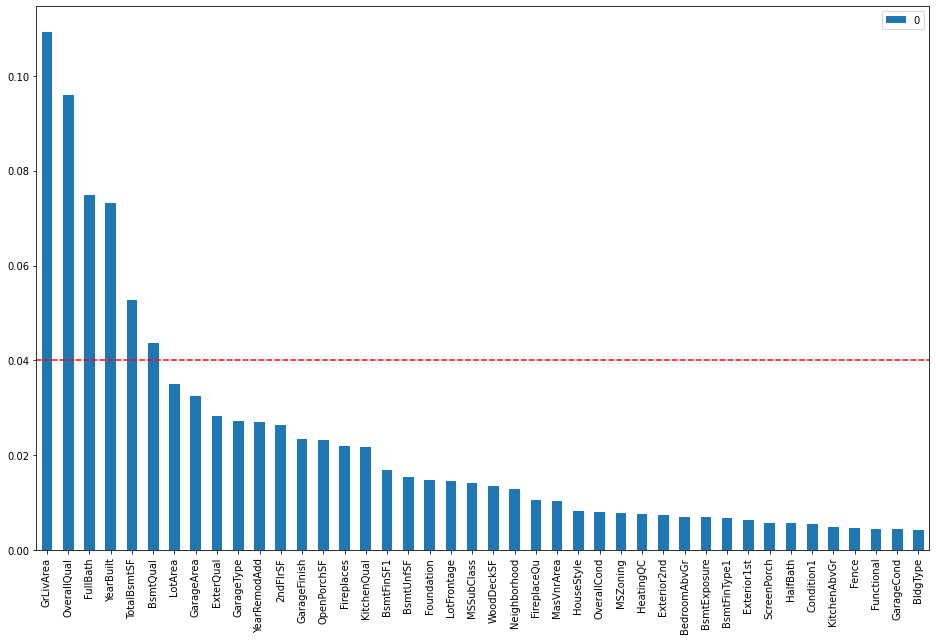

In [17]:
#  randomForest.feature_importance

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42, oob_score=True )

rf.fit(X_train1, y_train1.astype('int'))

importances = rf.feature_importances_
forest_importances = pd.DataFrame (importances, index=X_train1.columns )

forest_importances = forest_importances.sort_values (forest_importances.columns[0],ascending=False)
forest_importances.head(42).plot.bar(figsize=(16,10))
plt.axhline(y = 0.04, color = 'r', linestyle = '--', label = 'Reference line')

Since the top 6 feature importances decrease at a more drastic speed, we decided to select the top 6 features by setting a threshold 0.04.

In [18]:
# let's remeber the top 6 features  (>0.04)

rf_top6 = ['GrLivArea', 'OverallQual', 'FullBath', 'YearBuilt', 'TotalBsmtSF', 'BsmtQual']

### 2.2.2 LR coefficents

In [19]:
# let's see LR coefficents of features with 4 variables eliminated

lr = LinearRegression()
lr.fit(X_train1, y_train1)
y_predicted = lr.predict(X_test1)
RMSLE(y_test1, y_predicted)

0.010157822875516639

In [20]:
lr.coef_

array([-0.00147058, -0.00433069,  0.00250405,  0.04426676,  0.00881844,
        0.00725881, -0.00139497, -0.00295522, -0.00890844, -0.00072851,
        0.00058394, -0.00148431,  0.00356764, -0.01188454, -0.00354633,
        0.00076876,  0.05558778,  0.0342582 ,  0.02269296,  0.00348524,
        0.00209784, -0.0012821 , -0.00731335,  0.00775655,  0.00472026,
        0.00535279, -0.00367096,  0.00556895,  0.00952953, -0.00594552,
        0.00137912, -0.00197107, -0.00137828,  0.00098991,  0.00475339,
       -0.0169913 ,  0.04989575,  0.00088889, -0.00271231,  0.00849225,
       -0.00041675, -0.00538566,  0.09144575,  0.00816373,  0.00539656,
        0.0033281 ,  0.00658623, -0.01569431, -0.00521009,  0.0122718 ,
        0.01001424, -0.00246137, -0.00357957,  0.00140106,  0.0224041 ,
       -0.00103414, -0.0001192 ,  0.00290146,  0.00787434,  0.0029155 ,
        0.00663907,  0.01263128,  0.04187989,  0.04560493,  0.00126225,
       -0.00580127, -0.00196058,  0.01325789])

In [21]:
len(lr.coef_) == len(X_train1.columns)

True

In [22]:
coeff = pd.DataFrame({'coeff': X_train1.columns, 'values': lr.coef_})
coeff

,coeff,values
0,MSSubClass,-0.001471
1,MSZoning,-0.004331
2,LotFrontage,0.002504
3,LotArea,0.044267
4,Street,0.008818
...,...,...
63,PoolQC,0.045605
64,Fence,0.001262
65,MiscFeature,-0.005801
66,SaleType,-0.001961


In [23]:
coeff = coeff.sort_values(by =['values'])
coeff

,coeff,values
35,BsmtUnfSF,-0.016991
47,KitchenAbvGr,-0.015694
13,Condition2,-0.011885
8,Utilities,-0.008908
22,Exterior1st,-0.007313
...,...,...
3,LotArea,0.044267
63,PoolQC,0.045605
36,TotalBsmtSF,0.049896
16,OverallQual,0.055588


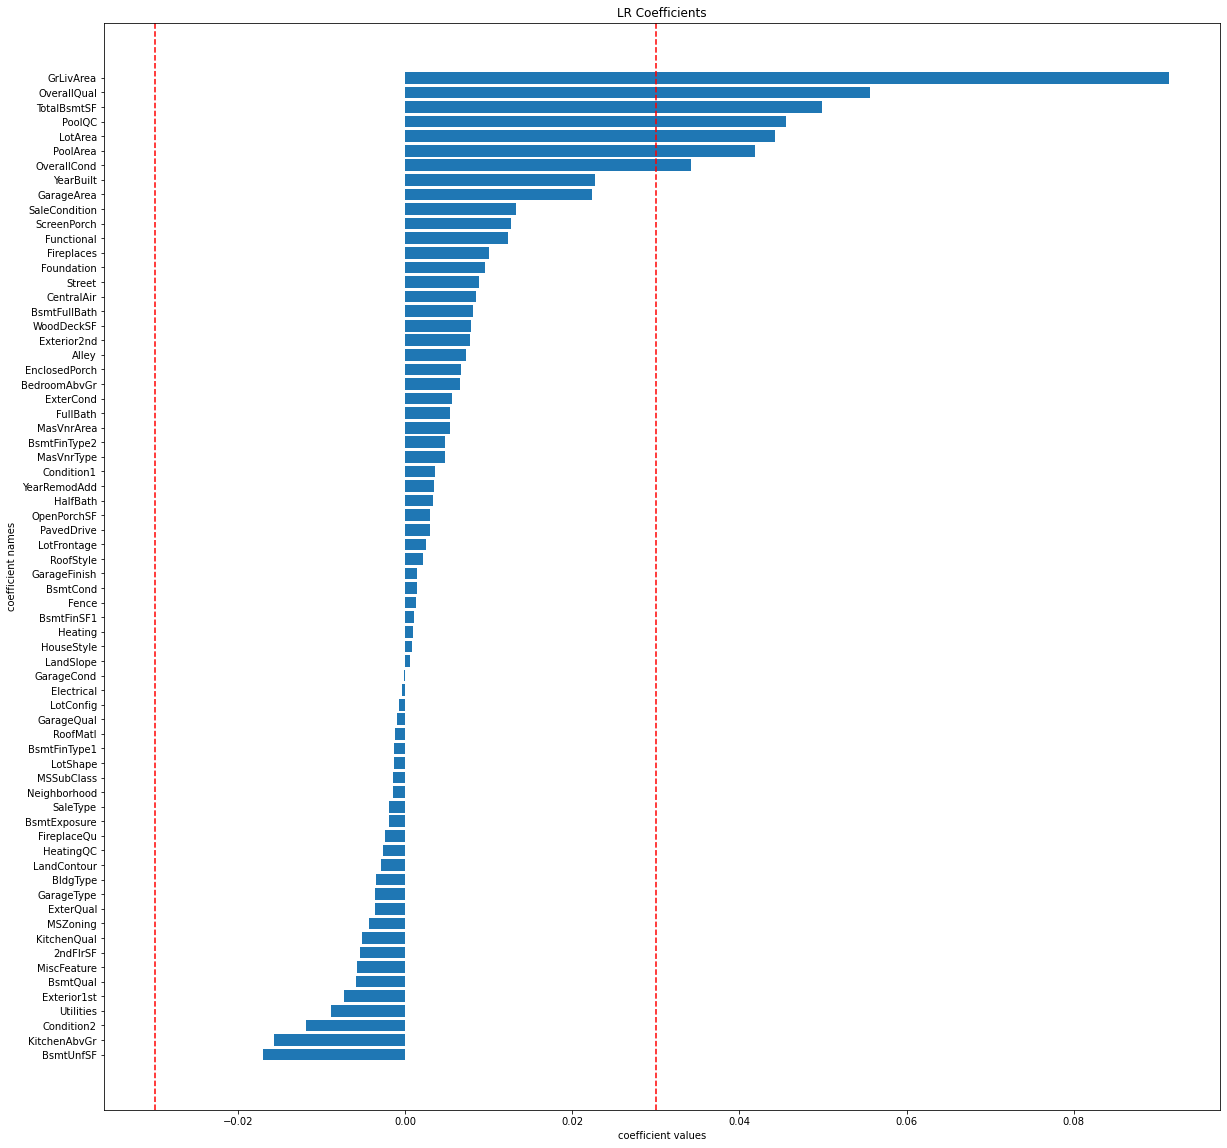

In [24]:
import matplotlib.pyplot as plt
 
plt.figure(figsize = (20, 20))

plt.barh(coeff['coeff'], coeff['values'])
plt.axvline(x = 0.03, color = 'r', linestyle = '--', label = 'Reference line')
plt.axvline(x = -0.03, color = 'r', linestyle = '--', label = 'Reference line')

# setting label of y-axis
plt.ylabel("coefficient names")
 
# setting label of x-axis
plt.xlabel("coefficient values")
plt.title("LR Coefficients")
plt.show()

We selected the top 7 features by setting a threshold 0.03, and the coefficients' absolute values should be larger than 0.03 in order to be kept.

In [25]:
# let's remember the top 7 features  (abs>0.03)

lr_top7 = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'PoolQC', 'LotArea', 'PoolArea', 'OverallCond']

### 2.2.3 Let's select the features

#### 2.2.3.1 Union or intersection

Let's see whether it's better to only keep the union or intersection.

In [26]:
rf_top6

['GrLivArea',
 'OverallQual',
 'FullBath',
 'YearBuilt',
 'TotalBsmtSF',
 'BsmtQual']

In [27]:
u = list(set(rf_top6).union(set(lr_top7)))
u

['GrLivArea',
 'TotalBsmtSF',
 'OverallQual',
 'BsmtQual',
 'OverallCond',
 'FullBath',
 'LotArea',
 'PoolArea',
 'YearBuilt',
 'PoolQC']

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train[u], train['SalePrice'], test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(X_train2, y_train2)
y_predicted = lr.predict(X_test2)
RMSLE(y_test2, y_predicted)

0.011659089862328732

In [29]:
i = list(set(rf_top6).intersection(set(lr_top7)))
i

['OverallQual', 'GrLivArea', 'TotalBsmtSF']

In [30]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(train[i], train['SalePrice'], test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(X_train3, y_train3)
y_predicted = lr.predict(X_test3)
RMSLE(y_test3, y_predicted)

0.014788375821586814

####2.2.3.2 Keep only one set

Keep only rf_top6

In [31]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(train[rf_top6], train['SalePrice'], test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(X_train4, y_train4)
y_predicted = lr.predict(X_test4)
RMSLE(y_test4, y_predicted)

0.01311814591392859

Keeo only lr_top7

In [32]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(train[lr_top7], train['SalePrice'], test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(X_train4, y_train4)
y_predicted = lr.predict(X_test4)
RMSLE(y_test4, y_predicted)

0.014347941567538946

Since all RMSLE values don't become better, we won't eliminate any features in this step.

#3 Exploration on dimensionality reduction methods

Golden rule: a wish to reduct n features to sqrt(n) features.

In [33]:
import math

math.sqrt(len(X_train1.columns))

8.246211251235321

## 3.1 Feature extraction methods

###3.1.1 PCA

In [34]:
# i.e. PCA, 

from sklearn.decomposition import PCA

# golden rule: number of features = sqrt(68)
# from 68-->10 features, seems always decrease, better not to use PCA to reduce dimensions
pca = PCA(n_components=8, random_state=1)
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)


lr = LinearRegression()
lr.fit(X_train_pca, y_train1)
y_predicted = lr.predict(X_test_pca)
RMSLE(y_test1, y_predicted)

0.01695992093054434

In [35]:
# i.e. PCA, 

from sklearn.decomposition import PCA

# from 68-->10 features, seems always decrease, better not to use PCA to reduce dimensions
pca = PCA(n_components=10, random_state=1)
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)


lr = LinearRegression()
lr.fit(X_train_pca, y_train1)
y_predicted = lr.predict(X_test_pca)
RMSLE(y_test1, y_predicted)

0.015643931058578732

In [36]:
# i.e. PCA, 

from sklearn.decomposition import PCA

# from 68-->10 features, seems always decrease, better not to use PCA to reduce dimensions
pca = PCA(n_components=67, random_state=1)
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)


lr = LinearRegression()
lr.fit(X_train_pca, y_train1)
y_predicted = lr.predict(X_test_pca)
RMSLE(y_test1, y_predicted)

0.010253951457414517

Since from 68-->8 features, RMSLE seems always decrease, we won't use PCA to reduce dimensions

###3.1.2 SVD

In [37]:
# SVD,

from sklearn.decomposition import TruncatedSVD

# current min RMSE 0.010116266422779404
svd = TruncatedSVD(n_components=67, random_state=1)
X_train_svd = svd.fit_transform(X_train1)
X_test_svd = svd.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_svd, y_train1)
y_predicted = lr.predict(X_test_svd)
RMSLE(y_test1, y_predicted)

0.010121687442857918

In [38]:
# SVD,

from sklearn.decomposition import TruncatedSVD

# current min RMSE 0.010116266422779404
svd = TruncatedSVD(n_components=66, random_state=1)
X_train_svd = svd.fit_transform(X_train1)
X_test_svd = svd.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_svd, y_train1)
y_predicted = lr.predict(X_test_svd)
RMSLE(y_test1, y_predicted)

0.010164222632296074

In [39]:
# SVD,

from sklearn.decomposition import TruncatedSVD

# current min RMSE 0.010116266422779404
svd = TruncatedSVD(n_components=60, random_state=1)
X_train_svd = svd.fit_transform(X_train1)
X_test_svd = svd.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_svd, y_train1)
y_predicted = lr.predict(X_test_svd)
RMSLE(y_test1, y_predicted)

0.010899472648245976

Since from 67 features, RMSLE seems always decrease, and the result for SVD when n_features = 67 is better than our baseline dataset. We'll keep this as our preferable choice.



In [40]:
# LDA, classifier, not suitable
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit(X_train1, y_train1).transform(X_train1)
X_test_lda = lda.transform(X_test1)

reg = DecisionTreeRegressor(random_state=1)
reg.fit(X_train_lda, y_train1)
y_predicted = reg.predict(X_test_lda)
RMSE(y_test1, y_predicted)
'''

'\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\n\nlda = LinearDiscriminantAnalysis(n_components=9)\nX_train_lda = lda.fit(X_train1, y_train1).transform(X_train1)\nX_test_lda = lda.transform(X_test1)\n\nreg = DecisionTreeRegressor(random_state=1)\nreg.fit(X_train_lda, y_train1)\ny_predicted = reg.predict(X_test_lda)\nRMSE(y_test1, y_predicted)\n'

###3.1.3 FA

In [41]:
# FA

from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=8, random_state=42)
X_train_fa = fa.fit_transform(X_train1)
X_test_fa = fa.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fa, y_train1)
y_predicted = lr.predict(X_test_fa)
RMSLE(y_test1, y_predicted)

0.012480229821392111

In [42]:
# FA

from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=65, random_state=42)
X_train_fa = fa.fit_transform(X_train1)
X_test_fa = fa.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fa, y_train1)
y_predicted = lr.predict(X_test_fa)
RMSLE(y_test1, y_predicted)

0.01028352010678433

In [43]:
# FA

from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=67, random_state=42)
X_train_fa = fa.fit_transform(X_train1)
X_test_fa = fa.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fa, y_train1)
y_predicted = lr.predict(X_test_fa)
RMSLE(y_test1, y_predicted)

0.010278321024581935

Since from 68-->8 features, RMSLE seems always decrease, we won't use FA to reduce dimensions

## 3.2 Feature selection by subset selection algorithms (forward/backward/floating)

In [44]:
!pip install mlxtend

In [45]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

### 3.2.1 Forward search

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# forward search
fs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

fs.fit(X_train1, y_train1)
X_train_fs = fs.transform(X_train1)
X_test_fs = fs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fs, y_train1)
y_predicted = lr.predict(X_test_fs)
RMSLE(y_test1, y_predicted)

0.011173220062379596

In [47]:
# i.e. forward search

fs = SFS(LinearRegression(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

fs.fit(X_train1, y_train1)
X_train_fs = fs.transform(X_train1)
X_test_fs = fs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fs, y_train1)
y_predicted = lr.predict(X_test_fs)
RMSLE(y_test1, y_predicted)

0.010261056980341594

In [48]:
# i.e. forward search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

fs = SFS(LinearRegression(),
          k_features=20,
          forward=True,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

fs.fit(X_train1, y_train1)
X_train_fs = fs.transform(X_train1)
X_test_fs = fs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fs, y_train1)
y_predicted = lr.predict(X_test_fs)
RMSLE(y_test1, y_predicted)

0.010274951673059756

In [49]:
# i.e. forward search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

fs = SFS(LinearRegression(),
          k_features=25,
          forward=True,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

fs.fit(X_train1, y_train1)
X_train_fs = fs.transform(X_train1)
X_test_fs = fs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fs, y_train1)
y_predicted = lr.predict(X_test_fs)
RMSLE(y_test1, y_predicted)

0.010379029238016835

In [50]:
# forward search
fs = SFS(LinearRegression(),
          k_features=34,
          forward=True,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

fs.fit(X_train1, y_train1)
X_train_fs = fs.transform(X_train1)
X_test_fs = fs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fs, y_train1)
y_predicted = lr.predict(X_test_fs)
RMSLE(y_test1, y_predicted)

0.0102745498695348

### 3.2.2 Backward search

In [51]:
# backward search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

bs = SFS(LinearRegression(),
          k_features=8,
          forward=False,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

bs.fit(X_train1.values, y_train1)
X_train_bs = bs.transform(X_train1)
X_test_bs = bs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_bs, y_train1)
y_predicted = lr.predict(X_test_bs)
RMSLE(y_test1, y_predicted)

0.011063181045815508

In [52]:
# backward search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

bs = SFS(LinearRegression(),
          k_features=34,
          forward=False,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

bs.fit(X_train1.values, y_train1)
X_train_bs = bs.transform(X_train1)
X_test_bs = bs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_bs, y_train1)
y_predicted = lr.predict(X_test_bs)
RMSLE(y_test1, y_predicted)

0.010376255244059615

In [53]:
# backward search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

bs = SFS(LinearRegression(),
          k_features=51,
          forward=False,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

bs.fit(X_train1.values, y_train1)
X_train_bs = bs.transform(X_train1)
X_test_bs = bs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_bs, y_train1)
y_predicted = lr.predict(X_test_bs)
RMSLE(y_test1, y_predicted)

0.010447073025587584

In [54]:
# backward search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

bs = SFS(LinearRegression(),
          k_features=60,
          forward=False,
          floating=False,
          scoring = 'neg_root_mean_squared_error')

bs.fit(X_train1.values, y_train1)
X_train_bs = bs.transform(X_train1)
X_test_bs = bs.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_bs, y_train1)
y_predicted = lr.predict(X_test_bs)
RMSLE(y_test1, y_predicted)

0.010326104083549316

### 3.3.3 Floating search

In [55]:
# subset selection: floating search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

floating = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=True,
          scoring = 'neg_root_mean_squared_error')

floating.fit(X_train1.values, y_train1)
X_train_fl = floating.transform(X_train1)
X_test_fl = floating.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fl, y_train1)
y_predicted = lr.predict(X_test_fl)
RMSLE(y_test1, y_predicted)

0.011173220062379596

In [56]:
# subset selection: floating search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

floating = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=True,
          scoring = 'neg_root_mean_squared_error')

floating.fit(X_train1.values, y_train1)
X_train_fl = floating.transform(X_train1)
X_test_fl = floating.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fl, y_train1)
y_predicted = lr.predict(X_test_fl)
RMSLE(y_test1, y_predicted)

0.010795019328527037

In [57]:
# subset selection: floating search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

floating = SFS(LinearRegression(),
          k_features=34,
          forward=True,
          floating=True,
          scoring = 'neg_root_mean_squared_error')

floating.fit(X_train1.values, y_train1)
X_train_fl = floating.transform(X_train1)
X_test_fl = floating.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fl, y_train1)
y_predicted = lr.predict(X_test_fl)
RMSLE(y_test1, y_predicted)

0.010297514014642078

In [58]:
# subset selection: floating search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

floating = SFS(LinearRegression(),
          k_features=51,
          forward=True,
          floating=True,
          scoring = 'neg_root_mean_squared_error')

floating.fit(X_train1.values, y_train1)
X_train_fl = floating.transform(X_train1)
X_test_fl = floating.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fl, y_train1)
y_predicted = lr.predict(X_test_fl)
RMSLE(y_test1, y_predicted)

0.010241032961212081

In [59]:
# subset selection: floating search

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

floating = SFS(LinearRegression(),
          k_features=60,
          forward=True,
          floating=True,
          scoring = 'neg_root_mean_squared_error')

floating.fit(X_train1.values, y_train1)
X_train_fl = floating.transform(X_train1)
X_test_fl = floating.transform(X_test1)

lr = LinearRegression()
lr.fit(X_train_fl, y_train1)
y_predicted = lr.predict(X_test_fl)
RMSLE(y_test1, y_predicted)

0.010326104083549316

#4 A summary on feature engineering results


**1. Feature Engineering 1 (FE1)**

However, since SVD will affect the feature interpretability, **the second best features** are also considered:

Remove 4 features by correlation. **(totally 68 features, 1 label)**


**2. Feature Engineering 2 (FE2)**

Based on the baseline model LR, **the current best features**:

Remove 4 features by correlation, reduce by 1 feature by SVD. **(totally 67 features, 1 label)**


For FE1:
Log1_train_fe1.csv <br />
Log1_test_fe1.csv <br />


For FE2:
Since feature names are useless after SVD, we convert them to npy files instead csv files here. <br />
Log1_train_fe2.npy <br />
Log1_test_fe2.npy <br />

## 4.1 FS1 **(totally 68 features, 1 label)**

In [60]:
# we use log values of SalePrice for normalization

train_fs1 = train.copy()
train_fs1 = train_fs1.drop(columns=[similar_pairs[0][minimum1[0]], similar_pairs[1][minimum1[1]], similar_pairs[2][minimum1[2]], similar_pairs[3][minimum1[3]]])
train_fs1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,2.352941,7.5,2.076677,0.334198,10.0,5.0,10.0,10.0,0.0,10.0,0.0,2.083333,2.50,2.857143,0.0,7.142857,6.666667,5.00,9.492754,8.833333,2.0,0.0,8.571429,8.666667,3.333333,1.22500,6.666667,10.0,4.0,5.0,10.0,10.0,3.333333,3.226691,10.000000,0.642123,2.675000,2.0,0.0,10.0,10.0,4.697470,4.178561,3.333333,6.666667,5.0,3.75,3.333333,6.666667,10.000000,0.000000,6.0,1.666667,6.666667,3.942446,10.0,10.0,10.0,0.000000,1.115174,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.247699
1,0.000000,7.5,2.555911,0.387950,10.0,5.0,10.0,10.0,0.0,5.0,0.0,10.000000,1.25,2.857143,0.0,2.857143,5.555556,8.75,7.536232,4.333333,2.0,0.0,5.714286,5.333333,6.666667,0.00000,10.000000,10.0,2.0,5.0,10.0,2.5,0.000000,4.469835,10.000000,1.215753,3.943750,2.0,0.0,10.0,10.0,0.000000,2.818099,0.000000,6.666667,0.0,3.75,3.333333,10.000000,10.000000,3.333333,10.0,1.666667,6.666667,3.309353,10.0,10.0,10.0,3.477246,0.000000,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.109016
2,2.352941,7.5,2.172524,0.465073,10.0,5.0,0.0,10.0,0.0,10.0,0.0,2.083333,2.50,2.857143,0.0,7.142857,6.666667,5.00,9.347826,8.666667,2.0,0.0,8.571429,8.666667,3.333333,1.01250,6.666667,10.0,4.0,5.0,10.0,5.0,3.333333,2.221207,10.000000,1.857877,2.875000,2.0,0.0,10.0,10.0,4.763476,4.409353,3.333333,6.666667,5.0,3.75,3.333333,6.666667,10.000000,3.333333,10.0,1.666667,6.666667,4.374101,10.0,10.0,10.0,0.000000,0.767824,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.317171
3,2.941176,7.5,1.916933,0.385613,10.0,5.0,0.0,10.0,0.0,0.0,0.0,2.500000,2.50,2.857143,0.0,7.142857,6.666667,5.00,3.115942,3.333333,2.0,0.0,9.285714,10.000000,6.666667,0.00000,10.000000,10.0,0.0,10.0,2.5,10.0,0.000000,0.987203,10.000000,2.311644,2.362500,2.0,5.0,10.0,10.0,4.158416,4.199818,3.333333,3.333333,0.0,3.75,3.333333,6.666667,10.000000,3.333333,4.0,8.333333,10.000000,4.618705,10.0,10.0,10.0,0.000000,0.639854,4.927536,0.0,0.0,10.0,10.0,2.5,10.0,0.0,11.849405
4,2.352941,7.5,2.683706,0.605763,10.0,5.0,0.0,10.0,0.0,5.0,0.0,6.250000,2.50,2.857143,0.0,7.142857,7.777778,5.00,9.275362,8.333333,2.0,0.0,8.571429,8.666667,3.333333,2.18750,6.666667,10.0,4.0,5.0,10.0,0.0,3.333333,2.993601,10.000000,2.097603,3.578125,2.0,0.0,10.0,10.0,5.792079,5.660492,3.333333,6.666667,5.0,5.00,3.333333,6.666667,10.000000,3.333333,10.0,1.666667,6.666667,6.014388,10.0,10.0,10.0,2.240373,1.535649,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2.352941,7.5,1.980831,0.309285,10.0,5.0,10.0,10.0,0.0,10.0,0.0,3.333333,2.50,2.857143,0.0,7.142857,5.555556,5.00,9.202899,8.333333,2.0,0.0,8.571429,8.666667,6.666667,0.00000,10.000000,10.0,4.0,5.0,10.0,10.0,10.000000,0.000000,10.000000,4.079623,2.978125,2.0,0.0,10.0,10.0,3.817382,3.987246,0.000000,6.666667,5.0,3.75,3.333333,10.000000,10.000000,3.333333,10.0,1.666667,6.666667,3.309353,10.0,10.0,10.0,0.000000,0.731261,0.000000,0.0,0.0,10.0,10.0,2.5,10.0,8.0,12.072547
1450,0.000000,7.5,2.715655,0.555049,10.0,5.0,10.0,10.0,0.0,10.0,0.0,5.833333,2.50,2.857143,0.0,2.857143,5.555556,6.25,7.681159,6.333333,2.0,0.0,6.428571,6.666667,10.0

In [61]:
train_fs1.to_csv('Log1_train_fe1.csv')

In [62]:
test_fs1 = test.copy()
test_fs1 = test_fs1.drop(columns=[similar_pairs[0][minimum1[0]], similar_pairs[1][minimum1[1]], similar_pairs[2][minimum1[2]], similar_pairs[3][minimum1[3]]])
test_fs1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.000000,5.0,2.555911,0.482460,10.0,5.0,10.0,10.000000,0.0,10.0,0.0,5.000000,1.25,2.857143,0.0,2.857143,4.444444,6.25,6.449275,1.833333,2.0,0.0,8.571429,8.666667,6.666667,0.0000,10.000000,10.0,2.0,10.0,10.0,10.0,8.333333,2.138940,5.0,1.155822,2.756250,2.0,10.0,10.0,10.0,0.000000,1.706650,0.000000,3.333333,0.0,2.50,3.333333,10.000000,10.0,0.000000,6.0,1.666667,10.000000,5.251799,10.0,10.0,10.0,1.633606,0.000000,0.0,2.5,0.0,10.0,5.0,2.5,10.0,8.0
1,0.000000,7.5,2.587859,0.606090,10.0,5.0,0.0,10.000000,0.0,0.0,0.0,5.000000,2.50,2.857143,0.0,2.857143,5.555556,6.25,6.231884,1.333333,6.0,0.0,9.285714,9.333333,3.333333,0.6750,10.000000,10.0,2.0,10.0,10.0,10.0,0.000000,4.218464,10.0,1.738014,4.153125,2.0,10.0,10.0,10.0,0.000000,3.021561,0.000000,3.333333,5.0,3.75,3.333333,6.666667,10.0,0.000000,6.0,1.666667,10.000000,2.244604,10.0,10.0,10.0,4.585764,0.658135,0.0,0.0,0.0,10.0,10.0,0.0,10.0,8.0
2,2.352941,7.5,2.364217,0.585665,10.0,5.0,0.0,10.000000,0.0,10.0,0.0,3.333333,2.50,2.857143,0.0,7.142857,4.444444,5.00,9.057971,8.000000,2.0,0.0,8.571429,8.666667,6.666667,0.0000,10.000000,10.0,4.0,5.0,10.0,10.0,3.333333,3.615174,10.0,0.586473,2.900000,2.0,5.0,10.0,10.0,3.855886,3.932584,0.000000,6.666667,5.0,3.75,3.333333,10.000000,10.0,3.333333,10.0,1.666667,0.000000,3.467626,10.0,10.0,10.0,2.473746,0.621572,0.0,0.0,0.0,10.0,5.0,2.5,10.0,8.0
3,2.352941,7.5,2.492013,0.405618,10.0,5.0,0.0,10.000000,0.0,10.0,0.0,3.333333,2.50,2.857143,0.0,7.142857,5.555556,6.25,9.130435,8.000000,2.0,0.0,8.571429,8.666667,3.333333,0.1250,10.000000,10.0,4.0,10.0,10.0,10.0,3.333333,2.751371,10.0,1.386986,2.893750,2.0,0.0,10.0,10.0,3.729373,3.856666,0.000000,6.666667,5.0,3.75,3.333333,6.666667,10.0,3.333333,4.0,1.666667,0.000000,3.381295,10.0,10.0,10.0,4.200700,0.658135,0.0,0.0,0.0,10.0,10.0,2.5,10.0,8.0
4,5.882353,7.5,1.373802,0.173175,10.0,5.0,0.0,3.333333,0.0,10.0,0.0,9.166667,2.50,2.857143,10.0,2.857143,7.777778,5.00,8.695652,7.000000,2.0,0.0,4.285714,4.000000,6.666667,0.0000,6.666667,10.0,4.0,5.0,10.0,10.0,0.000000,1.202011,10.0,4.353596,4.000000,2.0,0.0,10.0,10.0,0.000000,2.872760,0.000000,6.666667,0.0,2.50,3.333333,6.666667,10.0,0.000000,6.0,1.666667,6.666667,3.640288,10.0,10.0,10.0,0.000000,1.499086,0.0,3.0,0.0,10.0,10.0,2.5,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,8.235294,10.0,0.670927,0.029727,10.0,5.0,10.0,10.000000,0.0,10.0,0.0,4.166667,2.50,2.857143,7.5,7.142857,3.333333,7.50,7.101449,3.333333,2.0,0.0,3.571429,3.333333,6.666667,0.0000,10.000000,10.0,2.0,10.0,10.0,10.0,10.000000,0.000000,10.0,2.337329,1.706250,2.0,5.0,10.0,10.0,3.003300,2.301852,0.000000,3.333333,5.0,3.75,3.333333,10.000000,10.0,0.000000,6.0,10.000000,3.333333,0.000000,6.0,6.0,10.0,0.000000,0.000000,0.0,0.0,0.0,10.0,10.0,2.5,10.0,8.0
1455,8.235294,10.0,0.670927,0.027764,10.0,5.0,10.0,10.000000,0.0,10.0,0.0,4.166667,2.50,2.857143,10.0,7.142857,3.333333,5.00,7.101449,3.333333,2.0,0.0,3.571429,3.333333,6.666667,0.0000,10.000000,10.0,2.0,10.0,10.0,10.0,8.333333,1.151737,10.0,1.258562,1.706250,2.0,10.0,10.0,10.0,3.003300,2.301852,0.0

In [63]:
test_fs1.to_csv('Log1_test_fe1.csv')

## 4.2 FS2 **(totally 67 features, 1 label)**

In [64]:
# SVD,

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=67, random_state=1)
train_fs2 = svd.fit_transform(train.drop(columns=['SalePrice', similar_pairs[0][minimum1[0]], similar_pairs[1][minimum1[1]], similar_pairs[2][minimum1[2]]]))
train_fs2

array([[ 5.10303094e+01,  4.80291401e+00, -3.52613727e+00, ...,
         3.14551272e-02,  7.66751774e-02,  1.67219288e-02],
       [ 4.93598032e+01,  2.10519737e+00,  3.84026578e+00, ...,
        -3.00005755e-02, -4.61400887e-02,  3.61663395e-02],
       [ 4.96186503e+01,  8.64632884e+00,  2.53214133e+00, ...,
         5.74921475e-02,  1.03113473e-01,  3.23985981e-02],
       ...,
       [ 4.59205631e+01,  2.43058121e+00, -3.80004271e+00, ...,
        -2.26309975e-01,  5.21964989e-03,  1.30391974e-01],
       [ 4.76723745e+01, -4.69783860e+00,  7.53721686e-01, ...,
         2.73380939e-02,  4.05044966e-01,  1.34492353e-01],
       [ 4.75823679e+01, -1.64179235e+00,  2.64588491e+00, ...,
         2.99078402e-02, -1.10084625e-01,  1.30969124e-02]])

In [65]:
train_fs2.shape

(1454, 67)

In [66]:
# convert PriceSale to log PriceSale
sales = train.SalePrice.values
sales

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [67]:
sales.shape

(1454,)

In [68]:
sales = np.expand_dims(sales, axis=1)
sales

array([[12.24769912],
       [12.10901644],
       [12.31717117],
       ...,
       [12.49313327],
       [11.86446927],
       [11.90159023]])

In [69]:
# insert back log(Saleprice)
train_fs2 = np.concatenate((train_fs2, sales), axis=1)
train_fs2

array([[ 5.10303094e+01,  4.80291401e+00, -3.52613727e+00, ...,
         7.66751774e-02,  1.67219288e-02,  1.22476991e+01],
       [ 4.93598032e+01,  2.10519737e+00,  3.84026578e+00, ...,
        -4.61400887e-02,  3.61663395e-02,  1.21090164e+01],
       [ 4.96186503e+01,  8.64632884e+00,  2.53214133e+00, ...,
         1.03113473e-01,  3.23985981e-02,  1.23171712e+01],
       ...,
       [ 4.59205631e+01,  2.43058121e+00, -3.80004271e+00, ...,
         5.21964989e-03,  1.30391974e-01,  1.24931333e+01],
       [ 4.76723745e+01, -4.69783860e+00,  7.53721686e-01, ...,
         4.05044966e-01,  1.34492353e-01,  1.18644693e+01],
       [ 4.75823679e+01, -1.64179235e+00,  2.64588491e+00, ...,
        -1.10084625e-01,  1.30969124e-02,  1.19015902e+01]])

In [70]:
train_fs2.shape

(1454, 68)

In [71]:
np.save('Log1_train_fe2.npy', train_fs2)

In [72]:
svd = TruncatedSVD(n_components=67, random_state=1)
test_fs2 = svd.fit_transform(test.drop(columns=[similar_pairs[0][minimum1[0]], similar_pairs[1][minimum1[1]], similar_pairs[2][minimum1[2]]]))
test_fs2

array([[ 5.00406626e+01, -9.13532239e+00,  3.25928157e+00, ...,
        -2.22645860e-01, -1.54629682e-02,  1.48787946e-01],
       [ 4.83838906e+01, -2.32711537e+00,  9.62299102e+00, ...,
        -5.24376997e-02,  3.99835390e-02,  5.38355035e-02],
       [ 5.00850811e+01,  5.70427335e+00,  3.14201030e+00, ...,
         8.30858874e-02,  2.41865841e-02,  1.15933154e-01],
       ...,
       [ 5.20395390e+01, -3.63053693e+00,  1.91531592e+00, ...,
        -8.19965065e-02,  4.55657087e-02,  4.44237203e-01],
       [ 4.81001998e+01, -3.01548283e+00,  2.39938546e+00, ...,
         8.60363734e-02,  2.98550829e-02,  9.17994597e-02],
       [ 4.94816013e+01,  6.90384061e+00, -1.02639782e-01, ...,
        -1.96289214e-02,  1.20232411e-02, -5.49626591e-02]])

In [73]:
test_fs2.shape

(1459, 67)

In [74]:
np.save('Log1_test_fe2.npy', test_fs2)